# Implementing Least Squares Linear Regression for Binary Classification


![title](img/img1.png)

# Preparing Our Python Environment

First, we import the packages we will use for data manipulation and visualization, namely Numpy, Matplotlib, and Pandas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

# Preparing Our Training Set

You are going to generate a set of binary classification data.

In [2]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
X.shape

(150, 4)

# Visualizing Our Data

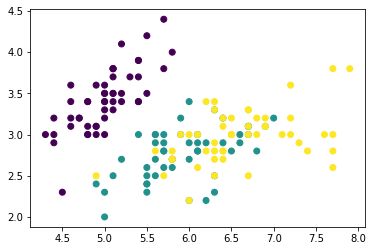

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

![title](img/img2.png)

In [ ]:
y ~ [0, 1, 1, 0, ...] -> [[1,0], [0,1], [0,1], [1,0]....]

In [6]:
onehot_encoder = OneHotEncoder(sparse=False)
t = y.reshape(-1,1)
onehot_encoded = onehot_encoder.fit_transform(t)
t = onehot_encoded
t

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [7]:
X = X[:,:2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [8]:
ones = np.ones(X.shape[0])
print(ones.shape)
ones = ones.reshape(X.shape[0],1)
ones.shape

(150,)


(150, 1)

In [9]:
X = np.concatenate((ones, X), axis=1)
X

array([[1. , 5.1, 3.5],
       [1. , 4.9, 3. ],
       [1. , 4.7, 3.2],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.6],
       [1. , 5.4, 3.9],
       [1. , 4.6, 3.4],
       [1. , 5. , 3.4],
       [1. , 4.4, 2.9],
       [1. , 4.9, 3.1],
       [1. , 5.4, 3.7],
       [1. , 4.8, 3.4],
       [1. , 4.8, 3. ],
       [1. , 4.3, 3. ],
       [1. , 5.8, 4. ],
       [1. , 5.7, 4.4],
       [1. , 5.4, 3.9],
       [1. , 5.1, 3.5],
       [1. , 5.7, 3.8],
       [1. , 5.1, 3.8],
       [1. , 5.4, 3.4],
       [1. , 5.1, 3.7],
       [1. , 4.6, 3.6],
       [1. , 5.1, 3.3],
       [1. , 4.8, 3.4],
       [1. , 5. , 3. ],
       [1. , 5. , 3.4],
       [1. , 5.2, 3.5],
       [1. , 5.2, 3.4],
       [1. , 4.7, 3.2],
       [1. , 4.8, 3.1],
       [1. , 5.4, 3.4],
       [1. , 5.2, 4.1],
       [1. , 5.5, 4.2],
       [1. , 4.9, 3.1],
       [1. , 5. , 3.2],
       [1. , 5.5, 3.5],
       [1. , 4.9, 3.6],
       [1. , 4.4, 3. ],
       [1. , 5.1, 3.4],
       [1. , 5. , 3.5],
       [1. , 4.5

In [10]:
beta = np.linalg.inv(X.T @ X) @ X.T @ t
beta

array([[ 0.7752867 ,  1.7927664 , -1.56805309],
       [-0.3744393 ,  0.01413691,  0.36030239],
       [ 0.57109254, -0.50437409, -0.06671845]])

In [11]:
beta00 = beta[0][0]-beta[0][1]
beta10 = beta[1][0]-beta[1][1]
beta20 = beta[2][0]-beta[2][1]
print(beta00, beta10,beta20)

-1.017479699777995 -0.3885762025507093 1.0754666299659745


In [12]:
beta01 = beta[0][1]-beta[0][2]
beta11 = beta[1][1]-beta[1][2]
beta21 = beta[2][1]-beta[2][2]
print(beta01, beta11,beta21)

3.360819492072816 -0.34616548554667553 -0.43765563831064347


In [13]:
beta02 = beta[0][2]-beta[0][0]
beta12 = beta[1][2]-beta[1][0]
beta22 = beta[2][2]-beta[2][0]
print(beta02, beta12,beta22)

-2.343339792294821 0.7347416880973848 -0.6378109916553312


In [16]:
line_x = np.linspace(4, 7,10)
line_y1 = - (beta00/beta20) - (beta10/beta20)*line_x
line_y2 = - (beta01/beta21) - (beta11/beta21)*line_x
line_y3 = - (beta02/beta22) - (beta12/beta22)*line_x

In [ ]:
# Take X as features you need (e.g. , 0 and 1 columns)
X = ...


# Add column of ones to account for bias term
X = ...

# Create y array of class labels
y = ...

# Calculate the Regularized Least Squares solution
beta = ...

![title](img/img3.png)

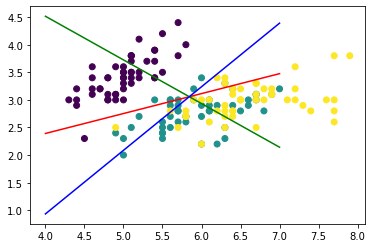

In [17]:
# Plot the resulting regression line
plt.scatter(X[:,1], X[:,2], c=y)

plt.plot(line_x, line_y1, c='r')
plt.plot(line_x, line_y2, c='g')
plt.plot(line_x, line_y3, c='b')